In [1]:
import os
if(os.path.exists("./dqn_example.py")):
    os.chdir("..")
    
import matplotlib.pyplot as plt
import pandas as pd
from absl import flags, app

from run import eval

C:\Users\Pascal\AppData\Roaming\Python\Python39\site-packages\tensorboardX\proto\resource_handle_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
C:\Users\Pascal\AppData\Roaming\Python\Python39\site-packages\tensorboardX\proto\resource_handle_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:\Users\Pascal\AppData\Roaming\Python\Python39\site-packages\tensorboardX\proto\resource_handle_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or qu

cuda


In [3]:
def get_labels(folder, key):
    labels = dict()
    # extract learning_rates from flags.txt
    date_dirs = os.listdir(os.path.join(root, folder))
    for date_dir in date_dirs:
        flags_dir = os.path.join(root, folder, date_dir, 'flags.txt')
        if(os.path.exists(flags_dir)):
            with open(flags_dir, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    if(line.startswith(f'--{key}')):
                        labels[date_dir] = line.split('=')[1].strip()
    return labels

n_evals = 100
root = './runs/'

folders = ['learning_rate/', 'warmup/', 'exp_final/', 'envs_1M', 'envs_100k', 'network/'] # 

# if a folder should be re-evaluated, remove eval.csv from it
def main(argv):
    for folder in folders:
        eval_results = dict()
        print(f'<{folder}>:')
        if(not os.path.exists(os.path.join(root, folder, 'eval.csv'))):
            eval_dirs = os.listdir(f'{root}{folder}')
            for eval_dir in eval_dirs:
                label_dict = get_labels(folder, 'network')
                network = 'DQN'
                if eval_dir in label_dict:
                    network = label_dict[eval_dir]

                eval_dir = os.path.join(folder, eval_dir, 'checkpoint-last.pt')

                eval_results[eval_dir] = eval(eval_dir, n_evals, network)
                df = pd.DataFrame.from_dict(eval_results)
                df.to_csv(os.path.join(root, folder, 'eval.csv'))
            else:
                pass

app.run(main, argv = None)

<learning_rate/>:
<warmup/>:
<exp_final/>:
<envs_1M>:
<envs_100k>:
<network/>:
Episode 0: reward=325.0, steps=1364, frames=4087
Episode 1: reward=180.0, steps=677, frames=2027
Episode 2: reward=465.0, steps=857, frames=2567
Episode 3: reward=415.0, steps=1106, frames=3313
Episode 4: reward=115.0, steps=632, frames=1891
Episode 5: reward=135.0, steps=660, frames=1975
Episode 6: reward=230.0, steps=1102, frames=3303
Episode 7: reward=150.0, steps=639, frames=1913
Episode 8: reward=620.0, steps=1124, frames=3369
Episode 9: reward=240.0, steps=1156, frames=3463
Episode 10: reward=220.0, steps=644, frames=1929
Episode 11: reward=15.0, steps=558, frames=1669
Episode 12: reward=415.0, steps=1300, frames=3895
Episode 13: reward=125.0, steps=596, frames=1783
Episode 14: reward=285.0, steps=903, frames=2705
Episode 15: reward=220.0, steps=1194, frames=3577
Episode 16: reward=170.0, steps=714, frames=2139
Episode 17: reward=190.0, steps=658, frames=1969
Episode 18: reward=185.0, steps=1080, frame

SystemExit: 

c:\Program Files\Python39\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
def show_boxplot(folder : str, title : str, ylabel :str, labels : list = None):
    df = pd.read_csv(os.path.join(root, folder, 'eval.csv'), index_col=0)
    fig, axs = plt.subplots(figsize=(22, 5))
    axs.set_title(title)
    if(labels == None):
        labels = df.columns
    elif(isinstance(labels, dict)):
        labels = labels.values()
    elif(isinstance(labels[0], float)):
        df.columns = labels
        df = df.sort_index(axis=1)
        labels = df.columns
    axs.boxplot(df, labels=labels, vert=False)
    axs.set_xlabel("reward")
    axs.set_ylabel(ylabel)
    plt.show()

def show_hists(folder : str, title : str, ylabel :str, labels : list = None):
    df = pd.read_csv(os.path.join(root, folder, 'eval.csv'), index_col=0)
    fig, axs = plt.subplots(6, 1, figsize=(22, 10))
    axs = axs.flatten()
    axs[0].set_title(title)
    if(labels == None):
        labels = df.columns
    elif(isinstance(labels, dict)):
        labels = labels.values()
    elif(isinstance(labels[0], float)):
        df.columns = labels
        df = df.sort_index(axis=1)
        labels = df.columns
    for i in range(0, df.shape[1], 1):
        i_data = df.shape[1]-1 - i
        axs[i].hist(df.iloc[:, i_data], bins=20)
        axs[i].set_xlabel("reward")
        axs[i].set_ylabel(labels[i_data])
    plt.show()

    

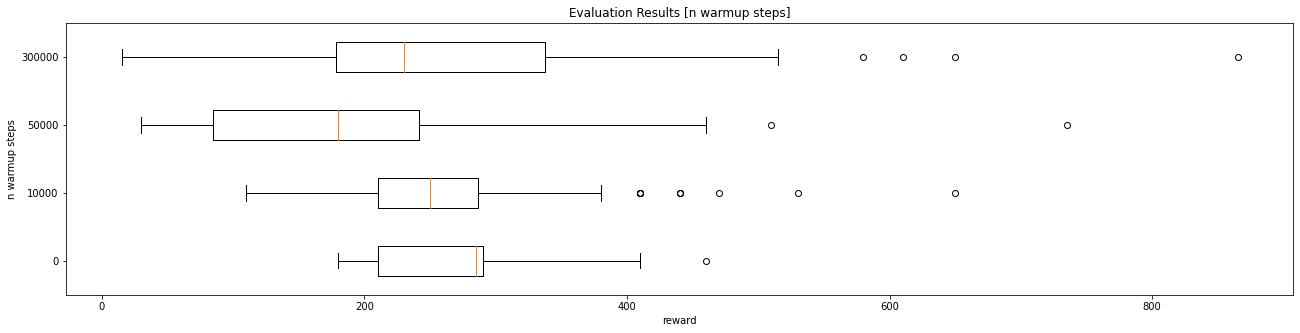

In [5]:
show_boxplot('warmup', 'Evaluation Results [n warmup steps]', "n warmup steps", get_labels('warmup', 'warmup_steps')) # ['0', '10k', '50k', '300k']

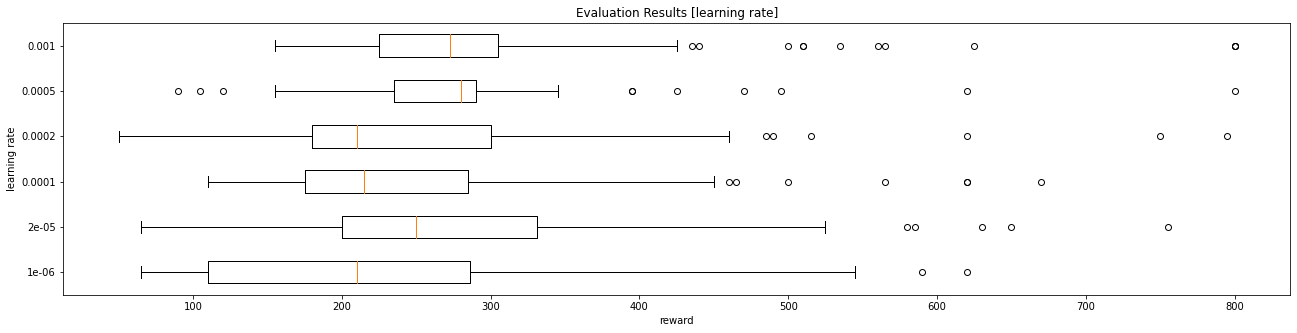

In [6]:
show_boxplot('learning_rate', 'Evaluation Results [learning rate]', "learning rate", [float(x) for x in get_labels('learning_rate', 'learning_rate').values()])

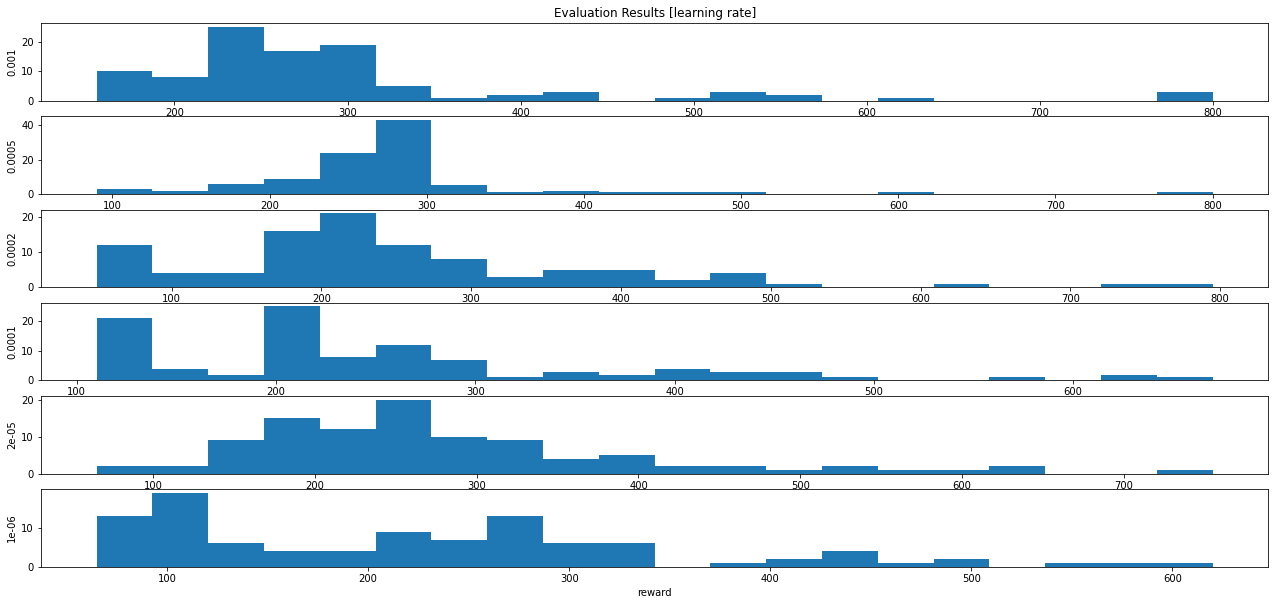

In [7]:
show_hists('learning_rate', 'Evaluation Results [learning rate]', "learning rate", [float(x) for x in get_labels('learning_rate', 'learning_rate').values()])

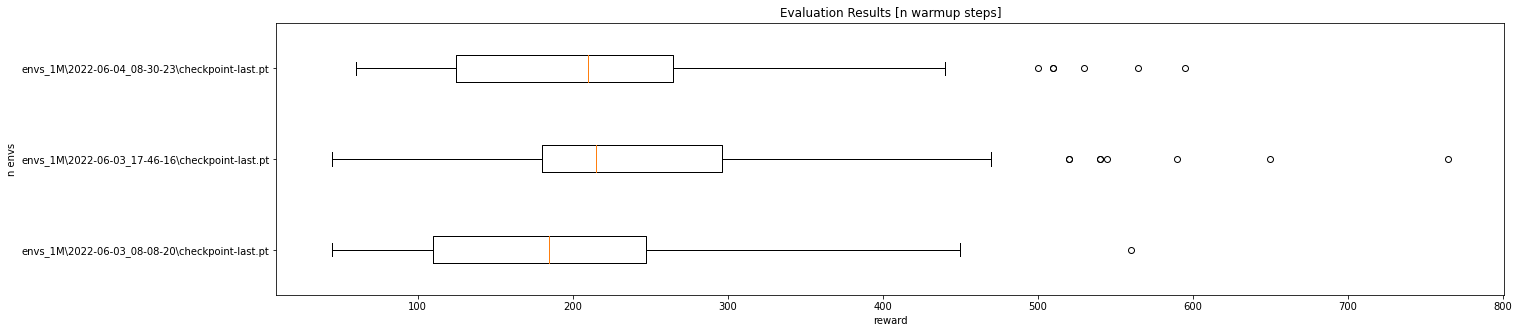

In [6]:
show_boxplot('envs_1M', 'Evaluation Results [n warmup steps]', "n envs", None) # get_labels('envs_1M', 'num_envs')

In [7]:
get_labels('network', 'network')

{'2022-06-07_11-52-19': 'DQN',
 '2022-06-08_22-19-15': 'DDQN',
 '2022-06-08_23-52-19': 'DUELING_DDQN',
 '2022-06-09_01-31-34': 'DUELING_DQN'}

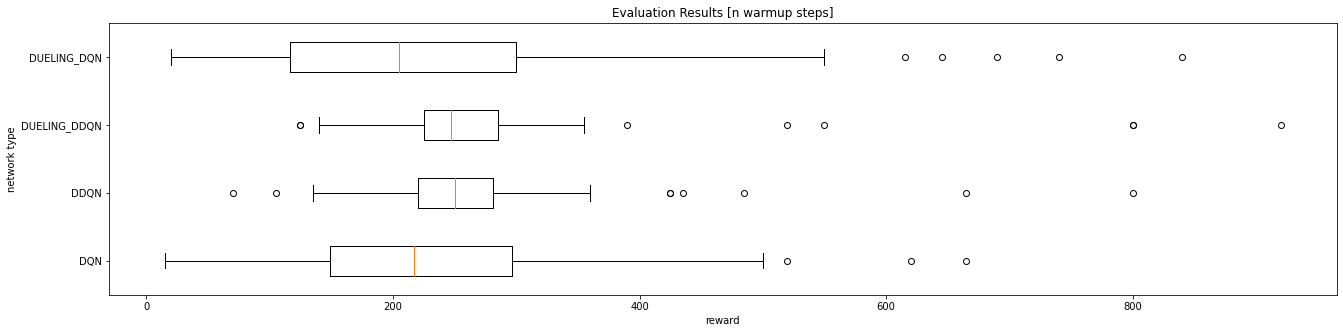

In [5]:
show_boxplot('network', 'Evaluation Results [n warmup steps]', "network type", get_labels('network', 'network'))